In [1]:
import pandas as pd
import numpy as np
import sklearn as sl
import pickle

In [2]:
# load the data
data = pd.read_csv("datasets/exams.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [3]:
# -----------perform eda------------
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.811767,0.790055
reading score,0.811767,1.000000,0.948909
writing score,0.790055,0.948909,1.000000


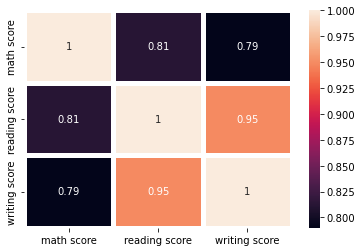

In [5]:
# correlation heat map
sns.heatmap(data.corr(), annot=True, linewidths=5)
plt.show()

In [6]:
# columns
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
#--------inspect th dataset
data.shape

(1000, 8)

In [8]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [9]:
# ------clean the dataset--------
#check for null valuez
data.isnull().any()
data.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [10]:
# check for duplicates
data.duplicated().any()

False

In [17]:
#---------Start my model----------
from sklearn import linear_model
from sklearn.utils import shuffle

# select the needed data
data = data[['math score', 'reading score', 'writing score']]
data.head()

,math score,reading score,writing score
0,59,70,78
1,96,93,87
2,57,76,77
3,70,70,63
4,83,85,86


In [16]:
# predict writing score
predict  = "writing score"

# set up the training data
x = np.array(data.drop(["writing score"], 1))       #attributes
y = np.array(data[predict])                 #writing score label

x_train, x_test, y_train, y_test = sl.model_selection.train_test_split(x, y, test_size=0.2)


#-----------Train the model and store the model with the highest accuracy-------------

# best = 0
# for _ in range(30):
#     x_train, x_test, y_train, y_test = sl.model_selection.train_test_split(x, y, test_size=0.1)

#     # create model
#     linearModel = linear_model.LinearRegression()

#     # best fit ine for the data
#     linearModel.fit(x_train, y_train)

#     # get model accuracy
#     accuracy = linearModel.score(x_test, y_test)
#     print(accuracy)

#     if accuracy > best:
#         best = accuracy
#         # save the mode using pickle
#         with open("studentgrades.pickle", "wb") as f:
#             pickle.dump(linearModel, f)



# load model
pickle_in = open("studentgrades.pickle", "rb")
linearModel = pickle.load(pickle_in)

# predict writing score
predictions = linearModel.predict(x_test)

count = 0
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])
    count += 1
    if count == 20:
        break


50.015032715492595 [39 52] 58
64.72380802179893 [79 65] 65
55.18368224279351 [46 57] 53
56.85490588673209 [42 59] 59
48.809969268003165 [51 50] 44
68.08608678785937 [55 70] 60
71.9133013403753 [88 72] 78
68.70722557979369 [82 69] 76
75.74174030288489 [72 77] 75
65.63752134650763 [62 67] 68
74.0705166589463 [76 75] 77
90.52861711193063 [97 91] 96
68.96013715620154 [70 70] 66
60.64368189287514 [58 62] 64
87.75026300142531 [82 89] 86
51.375074758467186 [46 53] 54
82.87296359690511 [80 84] 81
59.40017989901285 [53 61] 59
74.61477835813487 [69 76] 72
73.66262648705329 [69 75] 75


/tmp/ipykernel_27396/2405235578.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop(["writing score"], 1))       #attributes
